# ch03/活性化関数とは

閾値を境にして出力が切り替わる関数である。様々な種類がある。今回はその中でも有名なStep関数,Sigmoid関数,ReLU関数について学んでいく
<br>
<br>
※閾値・・・閾値とは、ある値が所定の水準を超えると特定の変化が生じたり判定・区別が変わったりする、という場合の「所定の水準」「数値的な境目」「境界線となる値」を意味する語である。

# ch03/step_function.py

- ステップ関数とは
    入力が０を超えたら１を出力し、それ以外は０を出力する
$$
    h(a)
 =
  \begin{cases}
    1 & ( x \geqq 0 ) \\
    0 & ( x < 0 )
  \end{cases}
$$



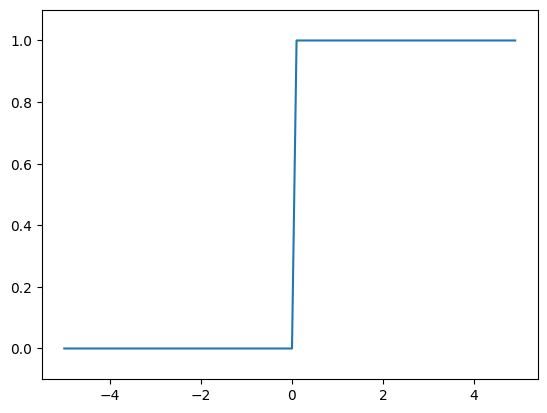

In [2]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int32)

X = np.arange(-5.0, 5.0, 0.1) #-5から5の範囲内で0.1刻みの配列を生成
Y = step_function(X) 
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()

# ch03/sigmoid.py

シグモイド関数は以下のような式になっている
$$
    h(x)
    =
    \frac{1}{1 + e^{ -x }}
$$
<br>
ニューラルネットワークでは活性化関数にシグモイド関数を用いて信号の変換を行い、その変換された
<br>
信号が次のニューロンに伝えられる。また、シグモイド関数はステップ関数と違い非線形な関数なので出力
<br>
の表現力が高い


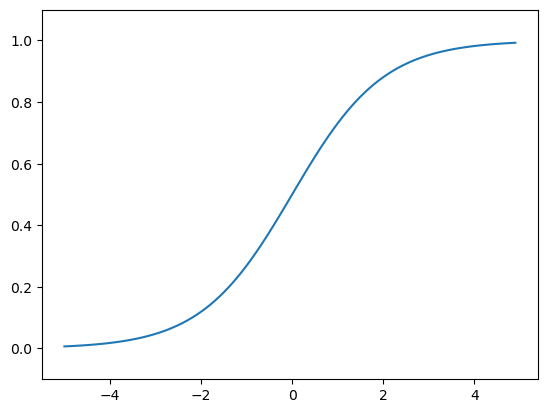

In [2]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


# ch03/sig_step_compare.py

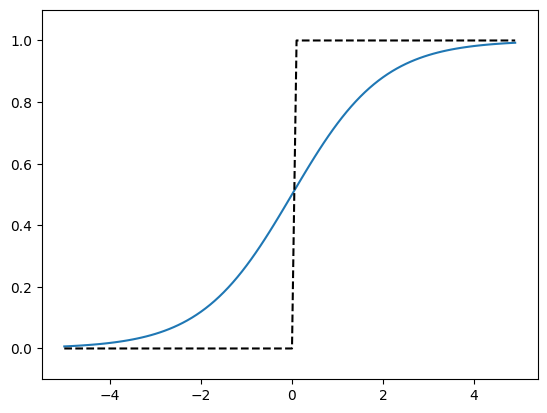

In [3]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()

# ch03/relu.py

ReLU関数は以下のような式になっている
$$
    h(a)
 =
  \begin{cases}
    x & ( x \geqq 0 ) \\
    0 & ( x < 0 )
  \end{cases}
$$
  
ReLU関数は関数への入力値が0以下の場合には出力値が常に0、入力値が0より上の場合には出力値が
<br>
入力値と同じ値となる関数である。また、前述のシグモイド関数よりも処理が速い。

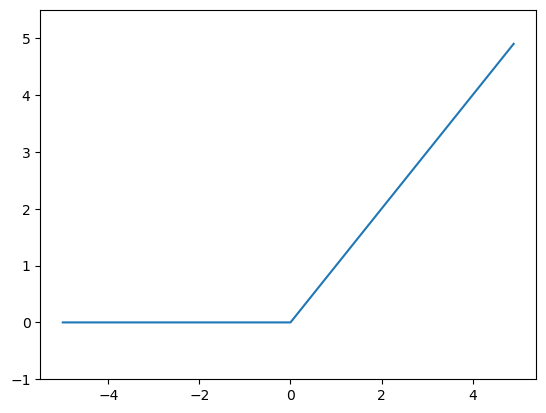

In [4]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

# ch03/多次元配列の計算


## ch03/行列の積

![行列の積](data/gyouretu1.gif)
![行列の積](data/gyouretu2.gif)

In [1]:
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
np.dot(A, B)

NameError: name 'np' is not defined

# ch03/ニューラルネットワークの行列の積

<img width="800" src="data/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88%202023-01-27%20201615.png">

In [8]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y =  np.dot(X, W)
print(Y)


(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


# ch03/３層ニューラルネットワークの実装

今回実装するモデルは入力層（第０層）は２つ、１つ目の隠れ層（第１層）は３つ、

２つ目の隠れ層（第２層）は２つ、出力層（第３層）２つの構成となっている


<img width="700" src="data\スクリーンショット 2023-01-27 202733.png">

### 重みの記号
初めに記号の定義から始めます。重みや隠れ層のニューロンの右上には「(1)」とあります。これは、第１層の重み、第１層ニューロン、という事を

意味している。また、重みの右下には２つの数字が並びますが、これは、次層のニューロンと前層のニューロンの番号から構成される。
<img width="700" src="data\スクリーンショット 2023-01-27 210612.png">

### 各層における信号伝達の実装

では入力層から第１層にかけてのニューラルネットワークの構築をやっていきます。

まず、入力層から「第１層目の１番目のニューロン」への信号の伝達を見ていきます。

図で表すと以下のようになります。

<img width="300" src="data\スクリーンショット 2023-01-27 212608.png">

ではこれを数式化しましょう

<img width="300" src="data\スクリーンショット 2023-01-27 221029.png">

また、行列の積を用いると、第１層目の「重み付き和」は次の式でまとめて表すことができます。

<img width="300" src="data\スクリーンショット 2023-01-27 224519.png">
<br>
<br>
<img width="600" src="data\スクリーンショット 2023-01-27 230409.png">
<br>
<br>
それではこの式をコーディングしていきましょう！！


In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

# ch03/mnist_show.py

In [5]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)


# ch03/neuralnet_mnist.py

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("../ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


# ch03/neuralnet_mnist_batch.py

In [7]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("../ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352
